## Classification on Diabetes Dataset

In [92]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [1]:
data = open("dataset/diabetes.data")

In [2]:
data = data.readlines()

In [3]:
data

['Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label\n',
 '6,148,72,35,0,33.6,0.627,50,1\n',
 '1,85,66,29,0,26.6,0.351,31,0\n',
 '8,183,64,0,0,23.3,0.672,32,1\n',
 '1,89,66,23,94,28.1,0.167,21,0\n',
 '0,137,40,35,168,43.1,2.288,33,1\n',
 '5,116,74,0,0,25.6,0.201,30,0\n',
 '3,78,50,32,88,31,0.248,26,1\n',
 '10,115,0,0,0,35.3,0.134,29,0\n',
 '2,197,70,45,543,30.5,0.158,53,1\n',
 '8,125,96,0,0,0,0.232,54,1\n',
 '4,110,92,0,0,37.6,0.191,30,0\n',
 '10,168,74,0,0,38,0.537,34,1\n',
 '10,139,80,0,0,27.1,1.441,57,0\n',
 '1,189,60,23,846,30.1,0.398,59,1\n',
 '5,166,72,19,175,25.8,0.587,51,1\n',
 '7,100,0,0,0,30,0.484,32,1\n',
 '0,118,84,47,230,45.8,0.551,31,1\n',
 '7,107,74,0,0,29.6,0.254,31,1\n',
 '1,103,30,38,83,43.3,0.183,33,0\n',
 '1,115,70,30,96,34.6,0.529,32,1\n',
 '3,126,88,41,235,39.3,0.704,27,0\n',
 '8,99,84,0,0,35.4,0.388,50,0\n',
 '7,196,90,0,0,39.8,0.451,41,1\n',
 '9,119,80,35,0,29,0.263,29,1\n',
 '11,143,94,33,146,36.6,0.254,51,1\n',
 '10,

In [4]:
for i in range(len(data)):
    data[i] = data[i].strip('\n')   # "This\n"  == > "This"

In [5]:
data

['Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label',
 '6,148,72,35,0,33.6,0.627,50,1',
 '1,85,66,29,0,26.6,0.351,31,0',
 '8,183,64,0,0,23.3,0.672,32,1',
 '1,89,66,23,94,28.1,0.167,21,0',
 '0,137,40,35,168,43.1,2.288,33,1',
 '5,116,74,0,0,25.6,0.201,30,0',
 '3,78,50,32,88,31,0.248,26,1',
 '10,115,0,0,0,35.3,0.134,29,0',
 '2,197,70,45,543,30.5,0.158,53,1',
 '8,125,96,0,0,0,0.232,54,1',
 '4,110,92,0,0,37.6,0.191,30,0',
 '10,168,74,0,0,38,0.537,34,1',
 '10,139,80,0,0,27.1,1.441,57,0',
 '1,189,60,23,846,30.1,0.398,59,1',
 '5,166,72,19,175,25.8,0.587,51,1',
 '7,100,0,0,0,30,0.484,32,1',
 '0,118,84,47,230,45.8,0.551,31,1',
 '7,107,74,0,0,29.6,0.254,31,1',
 '1,103,30,38,83,43.3,0.183,33,0',
 '1,115,70,30,96,34.6,0.529,32,1',
 '3,126,88,41,235,39.3,0.704,27,0',
 '8,99,84,0,0,35.4,0.388,50,0',
 '7,196,90,0,0,39.8,0.451,41,1',
 '9,119,80,35,0,29,0.263,29,1',
 '11,143,94,33,146,36.6,0.254,51,1',
 '10,125,70,26,115,31.1,0.205,41,1',
 '7,147,76,0,0,39.4,

In [6]:
for i in range(len(data)):
    data[i] = data[i].split(",") 

In [7]:
data

[['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age',
  'Label'],
 ['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'],
 ['1', '85', '66', '29', '0', '26.6', '0.351', '31', '0'],
 ['8', '183', '64', '0', '0', '23.3', '0.672', '32', '1'],
 ['1', '89', '66', '23', '94', '28.1', '0.167', '21', '0'],
 ['0', '137', '40', '35', '168', '43.1', '2.288', '33', '1'],
 ['5', '116', '74', '0', '0', '25.6', '0.201', '30', '0'],
 ['3', '78', '50', '32', '88', '31', '0.248', '26', '1'],
 ['10', '115', '0', '0', '0', '35.3', '0.134', '29', '0'],
 ['2', '197', '70', '45', '543', '30.5', '0.158', '53', '1'],
 ['8', '125', '96', '0', '0', '0', '0.232', '54', '1'],
 ['4', '110', '92', '0', '0', '37.6', '0.191', '30', '0'],
 ['10', '168', '74', '0', '0', '38', '0.537', '34', '1'],
 ['10', '139', '80', '0', '0', '27.1', '1.441', '57', '0'],
 ['1', '189', '60', '23', '846', '30.1', '0.398', '59', '1'],
 ['5', '166', '72', '19', 

In [8]:
header = data[0]
data.pop(0)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Label']

In [11]:
data

[['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'],
 ['1', '85', '66', '29', '0', '26.6', '0.351', '31', '0'],
 ['8', '183', '64', '0', '0', '23.3', '0.672', '32', '1'],
 ['1', '89', '66', '23', '94', '28.1', '0.167', '21', '0'],
 ['0', '137', '40', '35', '168', '43.1', '2.288', '33', '1'],
 ['5', '116', '74', '0', '0', '25.6', '0.201', '30', '0'],
 ['3', '78', '50', '32', '88', '31', '0.248', '26', '1'],
 ['10', '115', '0', '0', '0', '35.3', '0.134', '29', '0'],
 ['2', '197', '70', '45', '543', '30.5', '0.158', '53', '1'],
 ['8', '125', '96', '0', '0', '0', '0.232', '54', '1'],
 ['4', '110', '92', '0', '0', '37.6', '0.191', '30', '0'],
 ['10', '168', '74', '0', '0', '38', '0.537', '34', '1'],
 ['10', '139', '80', '0', '0', '27.1', '1.441', '57', '0'],
 ['1', '189', '60', '23', '846', '30.1', '0.398', '59', '1'],
 ['5', '166', '72', '19', '175', '25.8', '0.587', '51', '1'],
 ['7', '100', '0', '0', '0', '30', '0.484', '32', '1'],
 ['0', '118', '84', '47', '230', '45.8', '0.551',

In [12]:
y = []

for i in range(len(data)):
    y.append(int(data[i][-1]))
    data[i].pop(-1)
    
    for j in range(len(data[i])):
        data[i][j] = float(data[i][j])

In [14]:
data

[[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0],
 [1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0],
 [8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0],
 [1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0],
 [0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0],
 [5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0],
 [3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0],
 [10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0],
 [2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0],
 [8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0],
 [4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0],
 [10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0],
 [10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441, 57.0],
 [1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0],
 [5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 51.0],
 [7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.484, 32.0],
 [0.0, 118.0, 84.0, 47.0, 230.0, 45.8, 0.551, 31.0],
 [7.0, 107.0, 74.0, 0.0, 0.0, 29.6, 0.254, 31.0],
 [1.0, 103.0, 30.0, 38.0, 83.0, 43.3, 0.183, 33.0],
 [1.0, 115.0, 70.0, 30.0, 96.0

In [16]:
data = np.asarray(data, dtype = np.float16)
y = np.asarray(y, dtype = np.float16)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 42)    

In [66]:
X_train.shape

(614, 8)

In [67]:
clf = LogisticRegression(random_state = 0, max_iter = 1000)  # clf -> classifier

In [68]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [69]:
clf.score(X_test, y_test)   # mean accuracy

0.7467532467532467

In [70]:
print("The accuracy score is: %.2f " %(100*clf.score(X_test, y_test)))

The accuracy score is: 74.68 


### L2 Regularization 

In [71]:
clf = LogisticRegression(penalty = 'l2' ,random_state = 0, max_iter = 1000)  # clf -> classifier

In [72]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [73]:
clf.score(X_test, y_test)

0.7467532467532467

### Classification + Feature Selection + Showing Decision Boundaries 

In [80]:
X_train.shape

(614, 8)

In [ ]:
X_train[0:614,i]

In [76]:
for i in range(X_train.shape[1]):    # shape = (614, 8)
    C = np.corrcoef(X_train[:,i],y_train)
    print("The correlation of variable %d is: %.3f "%(i,C[0,1]))

The correlation of variable 0 is: 0.208 
The correlation of variable 1 is: 0.456 
The correlation of variable 2 is: 0.082 
The correlation of variable 3 is: 0.058 
The correlation of variable 4 is: 0.108 
The correlation of variable 5 is: 0.306 
The correlation of variable 6 is: 0.155 
The correlation of variable 7 is: 0.281 


In [78]:
new_data = np.column_stack((data[:,1], data[:,5]))

In [81]:
new_data.shape

(768, 2)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size = 0.2, random_state = 42)    

In [84]:
clf = LogisticRegression(max_iter = 1000)

In [85]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [86]:
clf.score(X_test,y_test) 

0.7662337662337663

In [87]:
print(header[1])
print(header[5])

Glucose
BMI


In [88]:
b = clf.intercept_[0]
w1, w2 = clf.coef_.T


c = -b/w2
m = -w1/w2

In [89]:
clf.coef_.T

array([[0.03480445],
       [0.08425297]])

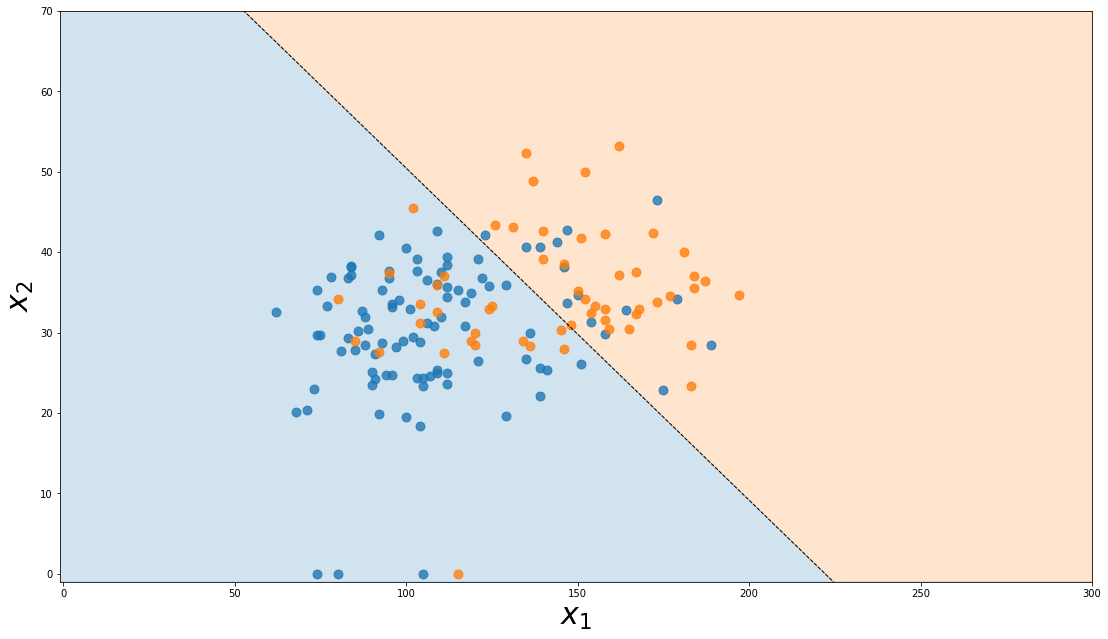

In [101]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 300
ymin, ymax = -1, 70
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*X_test[y_test==0].T, s=80, alpha=0.8)
plt.scatter(*X_test[y_test==1].T, s=80, alpha=0.8)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$', size = 30)
plt.xlabel(r'$x_1$', size = 30)

plt.show()